# The Great Language Divide: Investigating Question Quality by Programming Language on Stack Overflow

In [2]:
#import libraries
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h3>Data</h3>
Our data is from Kaggle, StackSample: 10% of Stack Overflow Q&A, which can be found here: https://www.kaggle.com/datasets/stackoverflow/stacksample

The data comes in three csv files, Questions, Answers, and Tags. 

Questions consists of 7 columns: [Id, OwnerUserId, CreationDate, ClosedDate, Score, Title, Body]

Answers consists of 6 columns: [Id, OwnerUserId, CreationDate, ParentId, Score, Body]

Tags consists of 2 columns: [Id, Tag]

In [3]:
# load datasets
a = pd.read_csv('Answers.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body'], low_memory=False)
#print(a.shape)
#print(a.info())
#a.head()
q = pd.read_csv('Questions.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body'], low_memory=False)
#print(q.shape)
#print(q.info())
#q.head()
t = pd.read_csv('Tags.csv', usecols = ['Id', 'Tag'], low_memory=False)
#print(t.shape)
#print(t.info())
#t.head()

<H3>Clean the Data</H3>
We now have the data from Kaggle loaded into three dataframes. We will first clean up the data by removing any rows with invalid numerical values and converting then into integer types. We will also remove any columns that we don't need. 

In [4]:
#clean questions dataframe
q_clean = q
# drop any rows where ID contains non-numerical values
q_clean = q_clean[q_clean['Id'].str.contains('\D') == False]
q_clean['Id'] = q_clean['Id'].astype(str).astype(int)
# drop any rows where Score contains non-numerical values
q_clean = q_clean[q_clean['Score'].str.contains('\D') == False]
q_clean['Score'] = q_clean['Score'].astype(str).astype(int)
#remove unwanted columns
q_clean.drop(["OwnerUserId"], axis=1, inplace=True)
print(q_clean.info())

#clean answers dataframe
a_clean = a
#remove unwanted columns
a_clean.drop(["Id", "OwnerUserId"], axis=1, inplace=True)
a_clean.rename(columns={'ParentId' : 'Id'}, inplace=True)
print(a_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 976367 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            976367 non-null  int32 
 1   CreationDate  976367 non-null  object
 2   ClosedDate    31217 non-null   object
 3   Score         976367 non-null  int32 
 4   Title         976367 non-null  object
 5   Body          976366 non-null  object
dtypes: int32(2), object(4)
memory usage: 44.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   CreationDate  1048575 non-null  object
 1   Id            1048575 non-null  int64 
 2   Score         1048575 non-null  int64 
 3   Body          1048575 non-null  object
dtypes: int64(2), object(2)
memory usage: 32.0+ MB
None


<H3>Reduce to Relevant Data</H3>
We now will select the languages we will be using to compare. By looking at the most frequent tags, we can select a set of languages to investigate. 

In [6]:
t['Tag'].value_counts(ascending=False).reset_index().head(25)

,Tag,count
0,c#,34979
1,java,29266
2,php,27837
3,javascript,26199
4,jquery,22814
5,android,22198
6,c++,14691
7,iphone,14482
8,python,13470
9,asp.net,13433


We shall focus on posts tagged with one the following programming languages: java, javascript, python, c++, c, html, sql, ruby, and php. To extract the data that we want to use, we will first create dataframes containing all the post Ids tagged with each of these languages. 

In [8]:
#extract relevent posts by tags
t_java = pd.DataFrame(t[t.Tag == 'java'])
print("Java: ", t_java.shape)

t_javascript = pd.DataFrame(t[t.Tag == 'javascript'])
print("javascript: ", t_javascript.shape)

t_python = pd.DataFrame(t[t.Tag == 'python'])
print("Python: ", t_python.shape)

t_cpp = pd.DataFrame(t[t.Tag == 'c++'])
print("C++: ", t_cpp.shape)

t_c = pd.DataFrame(t[t.Tag == 'c'])
print("C: ", t_c.shape)

t_html = pd.DataFrame(t[t.Tag == 'html'])
print("html: ", t_html.shape)

t_sql = pd.DataFrame(t[t.Tag == 'sql'])
print("sql: ", t_sql.shape)

t_ruby = pd.DataFrame(t[t.Tag == 'ruby'])
print("ruby: ", t_ruby.shape)

t_php = pd.DataFrame(t[t.Tag == 'php'])
print("php: ", t_php.shape)


Java:  (29266, 2)
javascript:  (26199, 2)
Python:  (13470, 2)
C++:  (14691, 2)
C:  (7095, 2)
html:  (12402, 2)
sql:  (9742, 2)
ruby:  (5434, 2)
php:  (27837, 2)


We will then use the IDs in the tag dataframes to extract the corresponding rows from the questions and answers dataframes. 

In [9]:
questions_java = pd.merge(t_java, q_clean, how='inner', on=['Id'])
answers_java = pd.merge(t_java, a_clean, how='inner', on=['Id'])

questions_javascript = pd.merge(t_javascript, q_clean, how='inner', on=['Id'])
answers_javascript = pd.merge(t_javascript, a_clean, how='inner', on=['Id'])

questions_python = pd.merge(t_python, q_clean, how='inner', on=['Id'])
answers_python = pd.merge(t_python, a_clean, how='inner', on=['Id'])

questions_cpp = pd.merge(t_cpp, q_clean, how='inner', on=['Id'])
answers_cpp = pd.merge(t_cpp, a_clean, how='inner', on=['Id'])

questions_c = pd.merge(t_c, q_clean, how='inner', on=['Id'])
answers_c = pd.merge(t_c, a_clean, how='inner', on=['Id'])

questions_html = pd.merge(t_html, q_clean, how='inner', on=['Id'])
answers_html = pd.merge(t_html, a_clean, how='inner', on=['Id'])

questions_sql = pd.merge(t_sql, q_clean, how='inner', on=['Id'])
answers_sql = pd.merge(t_sql, a_clean, how='inner', on=['Id'])

questions_ruby = pd.merge(t_ruby, q_clean, how='inner', on=['Id'])
answers_ruby = pd.merge(t_ruby, a_clean, how='inner', on=['Id'])

questions_php = pd.merge(t_php, q_clean, how='inner', on=['Id'])
answers_php = pd.merge(t_php, a_clean, how='inner', on=['Id'])


In [ ]:
questions_master = pd.concat([questions_java, questions_javascript, questions_python, questions_cpp, questions_c, questions_html, questions_sql, questions_ruby, questions_php])
answers_master = pd.concat([answers_java, answers_javascript, answers_python, answers_cpp, answers_c, answers_html, answers_sql, answers_ruby, answers_php])

#answers_master
#questions_master

<H3>Sentiment Analysis</H3>
We can now add sentiment analysis for the title and body of the questions, and for the body of the answers. We can use this to 

In [18]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

questions_master['title_sentiment'] = questions_master['Title'].apply(get_sentiment)
questions_master['body_sentiment'] = questions_master['Body'].apply(get_sentiment)
answers_master['body_sentiment'] = answers_master['Body'].apply(get_sentiment)

questions_master

,Id,Tag,CreationDate,ClosedDate,Score,Title,Body,title_sentiment,body_sentiment
0,4080,java,2008-08-06T22:45:27Z,2012-05-05T13:39:59Z,92,What code analysis tools do you use for your J...,<p>What code analysis tools do you use on your...,0.0,0.089286
1,4630,java,2008-08-07T12:26:50Z,NaN,8,"How can I Java webstart multiple, dependent, n...",<p>Example: I have two shared objects (same sh...,0.0,0.185000
2,7720,java,2008-08-11T12:37:50Z,NaN,33,Packaging Java apps for the Windows/Linux desktop,<p>I am writing an application in Java for the...,0.0,0.011389
3,10980,java,2008-08-14T13:16:37Z,NaN,8,IKVM and Licensing,<p>I have been looking into IKVMing Apache's F...,0.0,0.075000
4,11930,java,2008-08-15T03:32:28Z,NaN,9,How can I determine the IP of my router/gatewa...,<p>How can I determine the IP of my router/gat...,0.0,0.216667
...,...,...,...,...,...,...,...,...,...
26312,12872260,php,2012-10-13T10:31:56Z,NaN,1,Send generated html to a php script,<p>I already have this script</p>\n\n<pre><cod...,0.0,0.050000
26313,12872350,php,2012-10-13T10:44:56Z,NaN,1,Echoing '<pre>' to preserve breaks conflicts w...,<p>I want to echo mysql data from a TEXT colum...,0.0,0.375000
26314,12872390,php,2012-10-13T10:50:03Z,2012-10-15T03:00:33Z,0,php mail attachment not working,<p>I am new to php. I have found a script from...,0.0,0.058825
26315,12872530,php,2012-10-13T11:10:34Z,NaN,0,PHP AJAX Load More,<p>Hi i have a script that when user click loa...,0.5,0.279830


Questions: Title Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

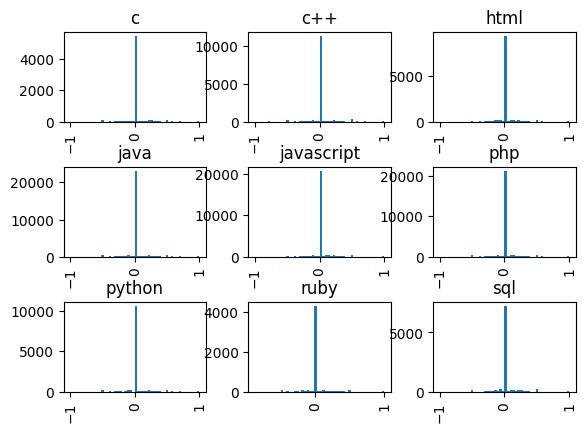

In [30]:
print("Questions: Title Sentiment by Language")
questions_master["title_sentiment"].hist(by=questions_master["Tag"], bins=50)

Questions: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

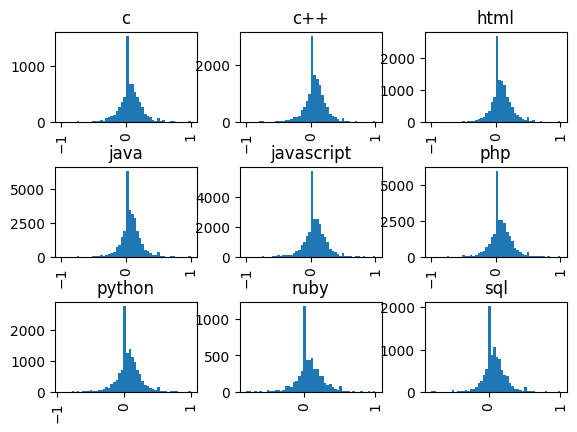

In [33]:
print("Questions: Body Sentiment by Language")
questions_master["body_sentiment"].hist(by=questions_master["Tag"], bins = 50)

Answers: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

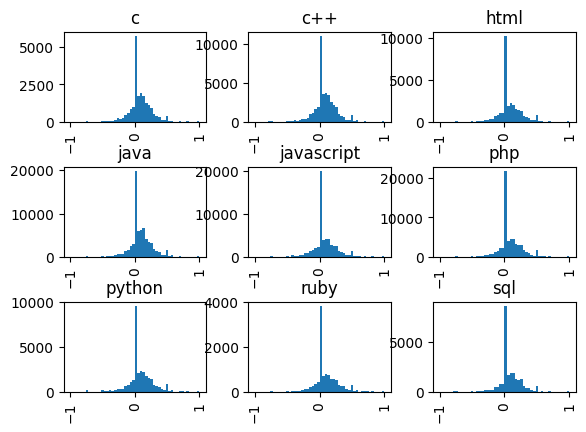

In [34]:
print("Answers: Body Sentiment by Language")
answers_master["body_sentiment"].hist(by=answers_master["Tag"], bins = 50)

We can see from the distribution of the sentiment analysis that the titles are almost entirely neutral. The sentiment of the body of the questions has a normal distribution for all the languages, with the vast majority of cases at or close to zero. There are slightly more cases above zero, so these would be categorized as 'neutral, leaning towards positive'. The body of the answers is similar, the vast majority are zero, with the rest following a normal distribution centered slightly above zero. This implies that the majority of answers can also be categorized as 'neutral' or 'neutral, leaning towards positive'. There are no great differences in the distribution of sentiment analysis between any of these languages. 

Next we will investigate the score distributions for the questions and answers. 

Questions: Score by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

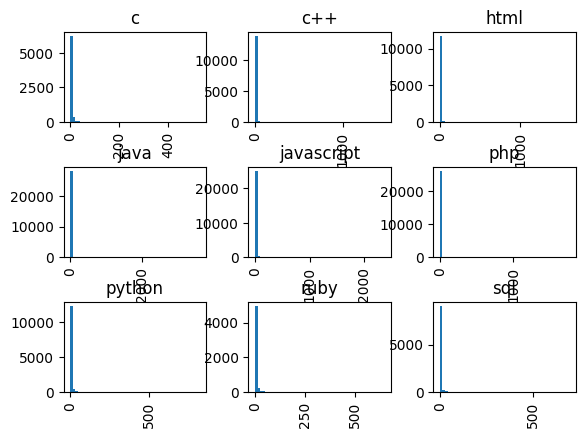

In [52]:
print("Questions: Score by Language")
questions_master["Score"].hist(by=questions_master["Tag"], bins = 50)

The distributions have such a large number of scores set to zero that the histograms are not much help, we cannot see much detail. We shall look at the mean, max, and min for the scores to get a better idea of the distributions. 

In [60]:
questions_score_stats = questions_master.groupby('Tag').agg({'Score': ['mean', 'min', 'max', 'count']})
questions_score_stats

Score                 
                mean min   max  count
Tag                                  
c           5.062978   0   526   6796
c++         5.156790   0  1473  14242
html        4.132207   0  1614  11898
java        4.761856   0  3613  28340
javascript  4.893396   0  2363  25365
php         2.547935   0  1760  26317
python      6.445853   0   824  13094
ruby        5.314318   0   648   5364
sql         3.768596   0   696   9451

In [57]:
answers_score_stats = answers_master.groupby('Tag').agg({'Score': ['mean', 'min', 'max', 'count']})
answers_score_stats

Score                 
                mean min   max  count
Tag                                  
c           4.125760 -15   709  20563
c++         4.147247 -15  1730  40123
html        3.602428 -17  1857  29157
java        4.147150 -13  3038  68420
javascript  4.462941 -18  2594  57934
php         2.716404 -15  3549  62455
python      5.809895 -23  1462  30520
ruby        5.879050 -25  1588  11203
sql         3.389672  -7  1412  24110

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

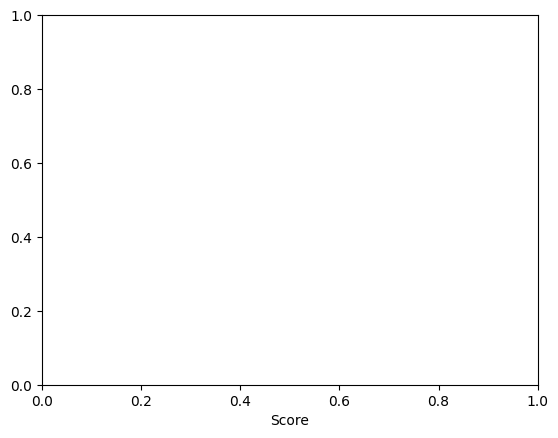

In [67]:
boxplot = questions_master.boxplot(column='Tag', by = 'Score')